In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Txblackout = pd.read_csv("TEXASBLACKOUTINFO.csv")
Okblackout = pd.read_csv("OKLAHOMABLACKOUTINFO.csv")


In [5]:
#get length of customer list before dropping unknowns
totalCustomerAEffectedTX = len(Txblackout["Number of Customers Affected"])
totalCustomerAEffectedOK = len(Okblackout["Number of Customers Affected"])


#setting a variable = to the column of customers effected
numberCustomersTX = Txblackout["Number of Customers Affected"]
numberCustomersTX = Okblackout["Number of Customers Affected"]

In [6]:
#dropping the unknows
Txblackout.drop(Txblackout.index[Txblackout["Number of Customers Affected"] == "Unknown"], inplace = True)
Txblackout.reset_index()

#dropping the unknows
Okblackout.drop(Okblackout.index[Okblackout["Number of Customers Affected"] == "Unknown"], inplace = True)
Okblackout.reset_index()

,index,Area Affected,NERC Region,Alert Criteria,Event Type,Demand Loss (MW),Number of Customers Affected
0,0,Texas: Kleberg County;,TRE,"Unexpected Transmission loss within its area, ...",Transmission Interruption,13,6102
1,1,Texas: Cameron County;,TRE,Physical threat to its Facility excluding weat...,Suspicious Activity,0,0
2,2,Texas:,TRE,"Loss of electric service to more than 50,000 c...",Severe Weather,Unknown,2000000
3,7,Arkansas: Louisiana: Texas: Oklahoma:,SERC,Public appeal to reduce the use of electricity...,Severe Weather,461,125484
4,10,Texas: Harris County;,TRE,Firm load shedding of 100 Megawatts or more im...,Severe Weather,4966,1390000
5,11,Texas: Travis County;,TRE,Complete loss of monitoring or control capabil...,System Operations,0,0
6,14,Texas:,TRE,Firm load shedding of 100 Megawatts or more im...,Severe Weather,Unknown,175000
7,17,Texas: Travis County;,TRE,"Loss of electric service to more than 50,000 c...",Severe Weather,Unknown,219306
8,19,Texas: Bexar County;,TRE,"Loss of electric service to more than 50,000 c...",Severe Weather,Unknown,154000
9,22,Texas: Lubbock County;,TRE,Public appeal to reduce the use of electricity...,Severe Weather,116,29942


In [8]:
#getting the list of customers AFFECTED without the unknowns
customersAffectedTx = len(Txblackout["Number of Customers Affected"])
customersAffectedOk = len(Okblackout["Number of Customers Affected"])

In [9]:
Txblackout["Number of Customers Affected"]

0        6102
1           0
2     2000000
7      125484
10    1390000
11          0
14     175000
17     219306
19     154000
22      29942
26      25000
28      72000
29          0
32          0
34          0
38     840000
39          0
43          0
45          0
46          0
Name: Number of Customers Affected, dtype: object

In [11]:
#getting the sums
texasSum = (Txblackout.loc[:,"Number of Customers Affected"].astype(float)).sum()
oklahomaSum = (Okblackout["Number of Customers Affected"].astype(float)).sum()
texasSum

5036834.0

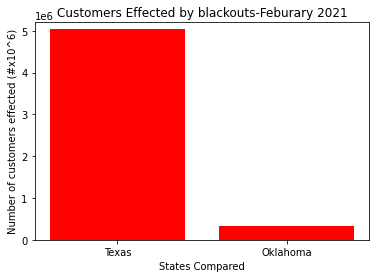

In [33]:
xValue = ["Texas", "Oklahoma"]
yValue = [texasSum, oklahomaSum]
plt.bar(xValue, yValue, color="r", align="center")
plt.ylim(top = 5200000)
plt.ylabel("Number of customers effected (#x10^6)")
plt.xlabel("States Compared")
plt.title("Customers Effected by blackouts-Feburary 2021")
plt.savefig("txOkBarChart.png")



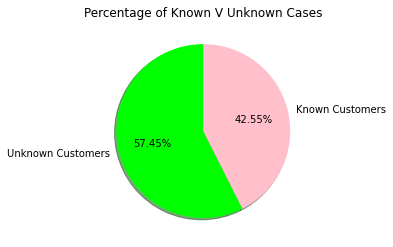

In [35]:
diffCustomersTx = totalCustomerAEffectedTX - customersAffectedTx
listNames = ["Unknown Customers", "Known Customers"]
pieColor = ["lime","pink"]

testList = [diffCustomersTx, customersAffectedTx]
plt.pie(testList, labels=listNames, autopct="%1.2f%%", startangle=90, colors = pieColor, shadow = True)
plt.title("Percentage of Known V Unknown Cases")
plt.savefig("knownVunknownCases.png")


